In [1]:
import pandas as pd

In [6]:
data_df = pd.read_csv('./data_banknote_authentication.txt', header=None)
data_df[4].value_counts(), data_df

(0    762
 1    610
 Name: 4, dtype: int64,
             0         1        2        3  4
 0     3.62160   8.66610  -2.8073 -0.44699  0
 1     4.54590   8.16740  -2.4586 -1.46210  0
 2     3.86600  -2.63830   1.9242  0.10645  0
 3     3.45660   9.52280  -4.0112 -3.59440  0
 4     0.32924  -4.45520   4.5718 -0.98880  0
 ...       ...       ...      ...      ... ..
 1367  0.40614   1.34920  -1.4501 -0.55949  1
 1368 -1.38870  -4.87730   6.4774  0.34179  1
 1369 -3.75030 -13.45860  17.5932 -2.77710  1
 1370 -3.56370  -8.38270  12.3930 -1.28230  1
 1371 -2.54190  -0.65804   2.6842  1.19520  1
 
 [1372 rows x 5 columns])

In [7]:
data_df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [13]:
import numpy as np

def accuracy_score(y_real, y_pred):
    TP = sum(y_real * y_pred)
    FP = sum(np.logical_not(y_real) * y_pred)
    TN = sum(np.logical_not(y_real) * np.logical_not(y_pred))
    FN = sum(y_real * np.logical_not(y_pred))

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2*precision*recall / (precision + recall)
    specificity = TN/(TN+FP)

    return accuracy, precision, recall, F1, specificity

In [47]:
from sklearn.model_selection import train_test_split

X = data_df[data_df.columns[:-1]]
y = data_df[4]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1097, 4), (1097,), (275, 4), (275,))

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier()#n_estimators=200, max_samples=.3)
RFclassifier.fit(X_train, y_train);

y_tr_pred = RFclassifier.predict(X_train)
print("Score Train:")
accuracy, precision, recall, F1, specificity = accuracy_score(y_train, y_tr_pred)
print(f"accuracy = {accuracy*100:.2f}%, precision = {precision*100:.2f}%, recall = {recall*100:.2f}%, F1 = {F1*100:.2f}%, specificity = {specificity*100:.2f}%\n")

y_te_pred = RFclassifier.predict(X_test)
print("Score Test:")
accuracy, precision, recall, F1, specificity = accuracy_score(y_test, y_te_pred)
print(f"accuracy = {accuracy*100:.2f}%, precision = {precision*100:.2f}%, recall = {recall*100:.2f}%, F1 = {F1*100:.2f}%, specificity = {specificity*100:.2f}%")


Score Train:
accuracy = 100.00%, precision = 100.00%, recall = 100.00%, F1 = 100.00%, specificity = 100.00%

Score Test:
accuracy = 99.64%, precision = 100.00%, recall = 99.15%, F1 = 99.57%, specificity = 100.00%


### NN (Tensorflow)

In [50]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape = (X_train.shape[1],)),
    # tf.keras.layers.Dense(16, activation='tanh'),
    # tf.keras.layers.BatchNormalization(), tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 40        
                                                                 
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [51]:
fitting = model.fit(X_train, y_train, epochs=50, batch_size=128);

Epoch 1/50
9/9 [==============================] - 1s 1ms/step - loss: 1.6125 - accuracy: 0.2215
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 1.3849 - accuracy: 0.2115
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 1.1926 - accuracy: 0.2498
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 1.0338 - accuracy: 0.2808
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9044 - accuracy: 0.2735
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.3136
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7325 - accuracy: 0.3792
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.4111
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.4412
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.4686
Epoch 11/50
9/9 [======================

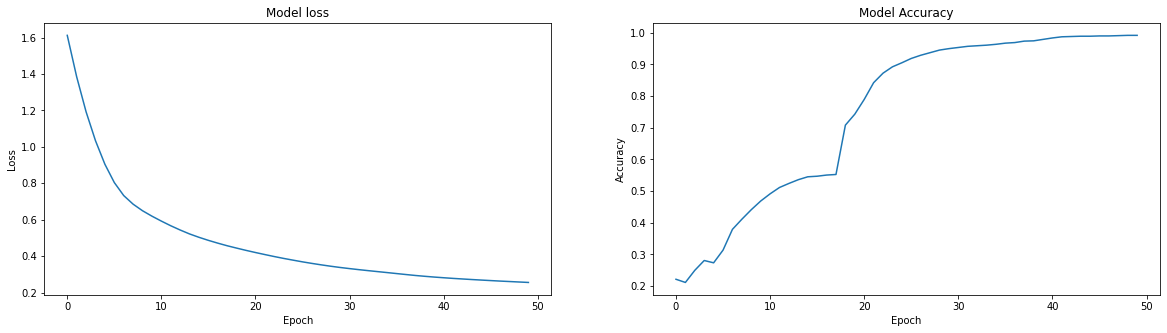

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df_loss_acc = pd.DataFrame(fitting.history)
df_loss= df_loss_acc[['loss']]
df_acc= df_loss_acc[['accuracy']]
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(df_loss)
ax[0].set(title='Model loss', xlabel='Epoch', ylabel='Loss')
ax[1].plot(df_acc)
ax[1].set(title='Model Accuracy', xlabel='Epoch',ylabel='Accuracy');

In [53]:
y_tr_pred = np.round(model.predict(X_train, verbose=0))
y_ts_pred = np.round(model.predict(X_test, verbose=0))

print("Score Train:")
y_pred = y_tr_pred.reshape(-1,).astype(int)
y_real = np.array(y_train)

accuracy, precision, recall, F1, specificity = accuracy_score(y_real, y_pred)
print(f"accuracy = {accuracy*100:.2f}%, precision = {precision*100:.2f}%, recall = {recall*100:.2f}%, F1 = {F1*100:.2f}%, specificity = {specificity*100:.2f}%\n")


print("Score Test:")
y_pred = y_ts_pred.reshape(-1,).astype(int)
y_real = np.array(y_test)

accuracy, precision, recall, F1, specificity = accuracy_score(y_real, y_pred)
print(f"accuracy = {accuracy*100:.2f}%, precision = {precision*100:.2f}%, recall = {recall*100:.2f}%, F1 = {F1*100:.2f}%, specificity = {specificity*100:.2f}%")

Score Train:
accuracy = 99.27%, precision = 100.00%, recall = 98.37%, F1 = 99.18%, specificity = 100.00%

Score Test:
accuracy = 99.27%, precision = 100.00%, recall = 98.31%, F1 = 99.15%, specificity = 100.00%
